# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [65]:
import pandas as pd
petrol_df = pd.read_csv('petrol.csv')
print(petrol_df.head())
print(petrol_df.tail())
print(petrol_df.shape)
print(petrol_df)

   tax   income   highway     dl   consumption
0  9.0     3571      1976  0.525           541
1  9.0     4092      1250  0.572           524
2  9.0     3865      1586  0.580           561
3  7.5     4870      2351  0.529           414
4  8.0     4399       431  0.544           410
    tax   income   highway     dl   consumption
43  7.0     3745      2611  0.508           591
44  6.0     5215      2302  0.672           782
45  9.0     4476      3942  0.571           510
46  7.0     4296      4083  0.623           610
47  7.0     5002      9794  0.593           524
(48, 5)
      tax   income   highway     dl   consumption
0    9.00     3571      1976  0.525           541
1    9.00     4092      1250  0.572           524
2    9.00     3865      1586  0.580           561
3    7.50     4870      2351  0.529           414
4    8.00     4399       431  0.544           410
5   10.00     5342      1333  0.571           457
6    8.00     5319     11868  0.451           344
7    8.00     5126    

In [4]:
petrol_df.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

Index(['tax', ' income', ' highway', ' dl', ' consumption'], dtype='object')
The shape of the Data Frame before splitting (48, 5)
tax                1.1250
 income          839.7500
 highway        4045.7500
 dl                0.0655
 consumption     123.2500
dtype: float64
The shape of the Data Frame after removing outliers (43, 5)


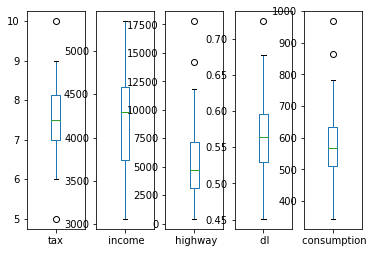

In [72]:
from scipy import stats
import matplotlib.pyplot as plt
columns=petrol_df.columns
print(columns)
petrol_df.plot(kind='box', subplots=True, layout=(1,5), sharex=False, sharey=False)
plt.show
print("The shape of the Data Frame before splitting {0}".format(petrol_df.shape))
Q1 = petrol_df.quantile(0.25)
Q3 = petrol_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
updated_df= petrol_df[~((petrol_df < (Q1 - 1.5 * IQR)) |(petrol_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("The shape of the Data Frame after removing outliers {}".format(updated_df.shape))

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

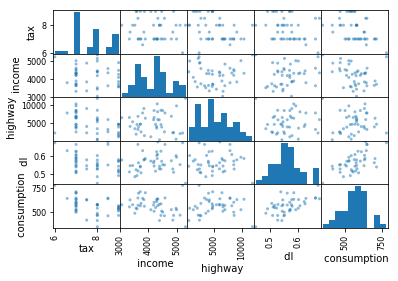

In [76]:
from pandas.plotting import scatter_matrix
scatter_matrix(updated_df)
plt.show()
#We can see that there is postove corelation between the number of DLs,highway and consumption

In [78]:
correlation = updated_df.corr()
correlation

,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [114]:
X=updated_df[[' dl']]
print(X)

       dl
0   0.525
1   0.572
2   0.580
3   0.529
4   0.544
6   0.451
7   0.553
8   0.529
9   0.552
10  0.530
12  0.574
13  0.545
14  0.608
15  0.586
16  0.572
17  0.540
19  0.677
20  0.663
21  0.602
22  0.511
23  0.517
24  0.551
25  0.544
26  0.548
27  0.579
28  0.563
29  0.493
30  0.518
31  0.513
32  0.578
33  0.547
34  0.487
35  0.629
37  0.586
38  0.663
40  0.626
41  0.563
42  0.603
43  0.508
44  0.672
45  0.571
46  0.623
47  0.593


In [ ]:
# Y=updated_df[updated_df.columns[4]]
Y=updated_df[[' consumption']]
print(Y)

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [116]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [117]:
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(34, 1) (9, 1) (34, 1) (9, 1)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [118]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(xTrain,yTrain)
coeff = regressor.coef_
intercept = regressor.intercept_
print(coeff,intercept)
X_updated=xTrain*3.19108
print(X_updated)

[[1081.5204082]] [-51.24284876]
          dl
34  1.554056
32  1.844444
23  1.649788
45  1.822107
2   1.850826
47  1.892310
21  1.921030
17  1.723183
25  1.735948
19  2.160361
43  1.621069
9   1.761476
15  1.869973
6   1.439177
20  2.115686
35  2.007189
16  1.825298
40  1.997616
8   1.688081
38  2.115686
1   1.825298
29  1.573202
14  1.940177
37  1.869973
27  1.847635
7   1.764667
26  1.748712
24  1.758285
22  1.630642
10  1.691272
44  2.144406
46  1.988043
3   1.688081
0   1.675317


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

0.020948757264672158


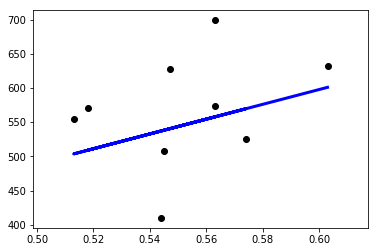

In [127]:
#using ordinary least square method for finding R squared
import statsmodels.api as sm
from sklearn.metrics import r2_score

y_pred = regressor.predict(xTest)

plt.scatter(xTest, yTest,  color='black')
plt.plot(xTest, y_pred, color='blue', linewidth=3)
print(r2_score(yTest,y_pred))


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [144]:
X_multi=updated_df[[' dl',' highway',' income']]
print(X_multi)
xmultiTrain, xmultiTest, = train_test_split(X_multi, test_size = 0.2, random_state = 0)
print(xmultiTrain.shape,xmultiTest.shape)

       dl   highway   income
0   0.525      1976     3571
1   0.572      1250     4092
2   0.580      1586     3865
3   0.529      2351     4870
4   0.544       431     4399
6   0.451     11868     5319
7   0.553      2138     5126
8   0.529      8577     4447
9   0.552      8507     4512
10  0.530      5939     4391
12  0.574      6930     4817
13  0.545      6580     4207
14  0.608      8159     4332
15  0.586     10340     4318
16  0.572      8508     4206
17  0.540      4725     3718
19  0.677      6010     4341
20  0.663      7834     4593
21  0.602       602     4983
22  0.511      2449     4897
23  0.517      4686     4258
24  0.551      2619     4574
25  0.544      4746     3721
26  0.548      5399     3448
27  0.579      9061     3846
28  0.563      5975     4188
29  0.493      4650     3601
30  0.518      6905     3640
31  0.513      6594     3333
32  0.578      6524     3063
33  0.547      4121     3357
34  0.487      3495     3528
35  0.629      7834     3802
37  0.586     

In [145]:
regressornew = linear_model.LinearRegression()
regressornew.fit(xmultiTrain,yTrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Question 9: Print the coefficients of the multilinear regression model

In [149]:
coeff_new = regressornew.coef_
intercept_new = regressornew.intercept_
print(coeff_new,intercept_new)


[[ 1.12991607e+03  1.13378162e-03 -5.99784216e-02]] [169.52064751]


In [151]:
#using ordinary least square method for finding R squared
import statsmodels.api as sm
print(xmultiTest)

ymulti_pred = regressornew.predict(xmultiTest)


       dl   highway   income
33  0.547      4121     3357
41  0.563      3985     3656
30  0.518      6905     3640
4   0.544       431     4399
12  0.574      6930     4817
28  0.563      5975     4188
31  0.513      6594     3333
13  0.545      6580     4207
42  0.603      3635     4300


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [153]:
from sklearn.metrics import r2_score
print(r2_score(yTest,ymulti_pred))

0.48383117731518954
